In [21]:
!pip install textblob

In [12]:
import pandas as pd
import numpy as np
import spacy
#from tqdm.auto import tqdm 
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from collections import Counter
import itertools
from spacy import displacy
import textstat
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import ngrams
from langdetect import detect
import nltk
import swifter
from textblob import TextBlob
import copy
#from IPython.display import Image
#import kaleido
import warnings
warnings.filterwarnings('ignore')
from nltk import everygrams
from nltk.corpus import stopwords
import re

In [23]:
! python -m spacy download en_core_web_sm

     ---------------------------------------- 13.9/13.9 MB 1.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
df1 = pd.read_csv("../scrapowanie/pr1.csv")
df2 = pd.read_csv("../scrapowanie/pr2.csv")

In [40]:
df = df1.append(df2, ignore_index=True)

In [41]:
df

title  \
0      Interoperability of messaging services – a gam...   
1      EU market adjusting to lack of sunflower oil f...   
2      S&Ds welcome the use of cohesion funds in EU r...   
3      Roaming calls within the EU remain cheap and i...   
4      S&Ds welcome the Strategic Compass as a big st...   
...                                                  ...   
12990             The world is learning about lab tests…   
12991  Results of EUFORES’ Inter-Parliamentary Meetin...   
12992  CPME: Health services: Patients and Medical do...   
12993  CPME: Health services: Patients and Medical do...   
12994  Mobility: the panacea for the EU labour market...   

                                                    text  \
0      Interoperability of messaging services is one ...   
1      Brussels, 24 March 2022 – A month after the in...   
2      The Socialists and Democrats in the European P...   
3      The European Parliament has adopted the new ru...   
4      One month ago, Vladimir Putin gave Russian tro...   
...                                                  ...   
12990  The Lab Tests Online community celebrated last...   
12991  On January 29th 2008, the Inter-Parliamentary ...   
12992  EPF and CPME: a Health services Directive is n...   
12993  You must have JavaScript enabled to use this f...   
12994  Brussels, 21 January 2009: CEEP participated w...   

                                            organisation  \
0      S&amp;D - Socialists &amp; Democrats in the Eu...   
1      FEDIOL - The EU Vegetable Oil and Proteinmeal ...   
2      S&amp;D - Socialists &amp; Democrats in the Eu...   
3      S&amp;D - Socialists &amp; Democrats in the Eu...   
4      S&amp;D - Socialists &amp; Democrats in the Eu...   
...                                                  ...   
12990  EDMA - European Diagnostic Manufacturers Assoc...   
12991  EUFORES - European Forum for Renewable Energy ...   
12992  CPME - The Standing Committee of European Doctors   
12993  CPME - The Standing Committee of European Doctors   
12994  CEEP - European Centre of Employers and Enterp...   

                            date  
0      2022-03-25T00:00:00+01:00  
1      2022-03-25T00:00:00+01:00  
2      2022-03-25T00:00:00+01:00  
3      2022-03-25T00:00:00+01:00  
4      2022-03-25T00:00:00+01:00  
...                          ...  
12990  2008-02-14T16:46:41+01:00  
12991  2008-02-14T16:38:47+01:00  
12992  2008-02-12T15:02:37+01:00  
12993  2008-02-12T15:01:07+01:00  
12994  2008-01-22T10:29:24+01:00  

[12995 rows x 4 columns]

In [42]:
print('Liczba zduplikowanych tekstów: ', len(df.text) - len(np.unique(df.text)))

Liczba zduplikowanych tekstów:  1033


### Dodanie kategorii

In [43]:
categories = pd.read_csv("categories.csv", index_col = 0)

In [44]:
df['category'] = categories

In [45]:
sum(categories.value_counts() >50)

30

### Usunięcie duplikujących się tekstów

In [46]:
df = df.drop_duplicates(subset='text')
df.reset_index(inplace=True, drop=True)
df

title  \
0      Interoperability of messaging services – a gam...   
1      EU market adjusting to lack of sunflower oil f...   
2      S&Ds welcome the use of cohesion funds in EU r...   
3      Roaming calls within the EU remain cheap and i...   
4      S&Ds welcome the Strategic Compass as a big st...   
...                                                  ...   
11957  CEEP wants the mission for flexicurity to have...   
11958             The world is learning about lab tests…   
11959  Results of EUFORES’ Inter-Parliamentary Meetin...   
11960  CPME: Health services: Patients and Medical do...   
11961  Mobility: the panacea for the EU labour market...   

                                                    text  \
0      Interoperability of messaging services is one ...   
1      Brussels, 24 March 2022 – A month after the in...   
2      The Socialists and Democrats in the European P...   
3      The European Parliament has adopted the new ru...   
4      One month ago, Vladimir Putin gave Russian tro...   
...                                                  ...   
11957  After the announcement of the setting up of a ...   
11958  The Lab Tests Online community celebrated last...   
11959  On January 29th 2008, the Inter-Parliamentary ...   
11960  EPF and CPME: a Health services Directive is n...   
11961  Brussels, 21 January 2009: CEEP participated w...   

                                            organisation  \
0      S&amp;D - Socialists &amp; Democrats in the Eu...   
1      FEDIOL - The EU Vegetable Oil and Proteinmeal ...   
2      S&amp;D - Socialists &amp; Democrats in the Eu...   
3      S&amp;D - Socialists &amp; Democrats in the Eu...   
4      S&amp;D - Socialists &amp; Democrats in the Eu...   
...                                                  ...   
11957  CEEP - European Centre of Employers and Enterp...   
11958  EDMA - European Diagnostic Manufacturers Assoc...   
11959  EUFORES - European Forum for Renewable Energy ...   
11960  CPME - The Standing Committee of European Doctors   
11961  CEEP - European Centre of Employers and Enterp...   

                            date              category  
0      2022-03-25T00:00:00+01:00           InfoSociety  
1      2022-03-25T00:00:00+01:00    Agriculture & Food  
2      2022-03-25T00:00:00+01:00        Euro & Finance  
3      2022-03-25T00:00:00+01:00           InfoSociety  
4      2022-03-25T00:00:00+01:00              Security  
...                          ...                   ...  
11957  2008-02-14T16:47:51+01:00  Social Europe & Jobs  
11958  2008-02-14T16:46:41+01:00    Health & Consumers  
11959  2008-02-14T16:38:47+01:00                   NaN  
11960  2008-02-12T15:02:37+01:00    Health & Consumers  
11961  2008-01-22T10:29:24+01:00  Social Europe & Jobs  

[11962 rows x 5 columns]

In [47]:
print('Liczba zduplikowanych tekstów: ', len(df.text) - len(np.unique(df.text)))

Liczba zduplikowanych tekstów:  0


Proces usuwania przebiegł pomyślnie!

## Statystyka opisowa

Swoje analizy przeprowadziliśmy na zbiorze danych utworzonym z dokumentów pobranych ze strony https://pr.euractiv.com/. Ramka danych zawiera:
- `title` tytuł dokumentu,
- `text` treść dokumentu,
- `organisation` nazwę organizacji, która dany dokument opublikowała,
- `data` datę publikacji.
- `category` kategorię tematyczną dokumentu

In [35]:
print('Liczba obserwacji: ', df.shape[0])
print(df.dtypes) # nic odkrywczego
print(df.apply(pd.isna).sum())

Liczba obserwacji:  11962
title           object
text            object
organisation    object
date            object
category        object
dtype: object
title             0
text              0
organisation      0
date              0
category        340
dtype: int64


362 braki w kolumnie 'category', czyli niektóre teksty nie mają przypisanej żadnej kategorii.

In [31]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date
df.year = df.year.apply(lambda x: x.year)
print('Liczba organizacji: ', df.organisation.nunique())
print('Okres z którego pochodzą dokumenty: ', df.year.nunique(), 'lat (lata ', df.year.min(),'-', df.year.max(), ')')

Liczba organizacji:  847
Okres z którego pochodzą dokumenty:  15 lat (lata  2008 - 2022 )


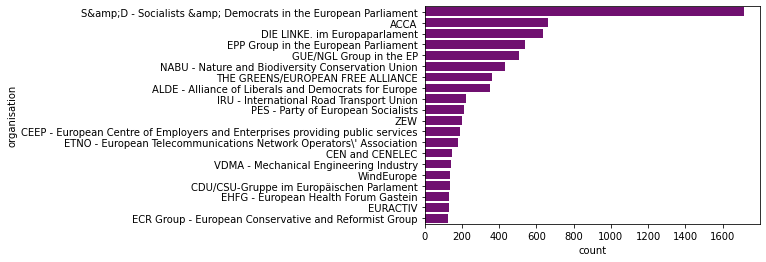

In [32]:
import seaborn as sns
ax = sns.countplot(y="organisation", data=df, 
                  order=df.organisation.value_counts().iloc[:20].index,
                  color='purple')

In [33]:
pd.DataFrame(df.organisation.value_counts().iloc[60:80])

organisation
EBAA - European Business Aviation Association                 39
EFET - European Federation of Energy Traders                  39
EuroACE -The European Alliance of Companies for...            37
CEMA - European Agricultural Machinery                        36
EBF - European Banking Federation                             35
PU Europe                                                     35
ILGA Europe - European Region of the Internatio...            34
FEDIOL - Federation for European Oil and Protei...            34
EPIA - European Photovoltaic Industry Association             33
European Parliament                                           33
Eurochild                                                     33
ACT                                                           32
EIM - European Rail Infrastructure Managers                   32
ECTA - European Competitive Telecommunications ...            32
The Brewers of Europe                                         31
APPLiA - Home Appliance Europe                                29
ETRMA - The European Tyre &amp; Rubber Manufact...            29
COCIR                                                         29
ChargeUp Europe                                               27
EDF - European Disability Forum                               27

Organizacje, które opublikowały największą liczbę dokumentów:
- `S@D Group` (Postępowy Sojusz Socjalistów i Demokratów w Parlamencie Europejskim)
- `ACCA`, międzynarodowa organizacja zrzeszająca specjalistów z zakresu finansów, rachunkowości i zarządzania. Według stanu z marca 2013 ACCA ma na całym świecie w 173 krajach 162 tysięcy członków i 428 tysięcy studentów.
- `DIE LINKE` (z niem. Lewica) - socjalizm demokratyczny
- `EPP Group` (Europejska Partia Ludowa - Chrześcijańscy Demokraci), największa grupa polityczna w PE


## Analiza stowarzyszeń politycznych 
https://pl.wikipedia.org/wiki/Parlament_Europejski#Sk%C5%82ad
- obecni deputowani (w sumie 705 posłów)
- rok powstania
- liczba publikacji (odczytana z tabelki)
- lewicowa/centrowa/prawicowa (-1/0/1)

In [34]:
import pandas as pd
import numpy as np

In [35]:
parties_df = pd.DataFrame({
    'name': ['EPP', 'S@D', 'RE', 'ID', 'G/EFA', 'ECR', 'GUE/NGL', 'niezrzeszeni'],
    'deputies': [187, 148, 97, 76, 68, 61,39, 29],
    'origin_year': [1976, 2009, 2019, 2019, 1999, 2009, 1995, np.nan],
    'publications': [540, 1713, np.nan, np.nan , 360, 124, 504, np.nan],
    'c': [0,-1,0,1,-1,1,-1, np.nan]
}) # nie znalazłam 'publications' dla RE i ID :(
parties_df

name  deputies  origin_year  publications    c
0           EPP       187       1976.0         540.0  0.0
1           S@D       148       2009.0        1713.0 -1.0
2            RE        97       2019.0           NaN  0.0
3            ID        76       2019.0           NaN  1.0
4         G/EFA        68       1999.0         360.0 -1.0
5           ECR        61       2009.0         124.0  1.0
6       GUE/NGL        39       1995.0         504.0 -1.0
7  niezrzeszeni        29          NaN           NaN  NaN

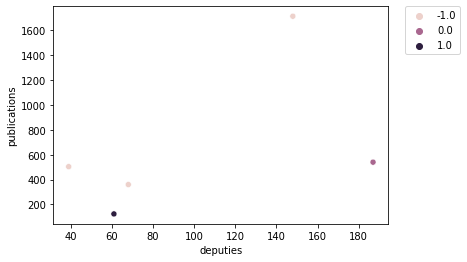

In [36]:
sns.scatterplot(parties_df.deputies, parties_df.publications, hue=parties_df.c )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

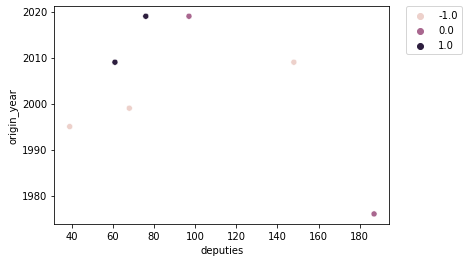

In [37]:
sns.scatterplot(parties_df.deputies, parties_df.origin_year, hue=parties_df.c )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

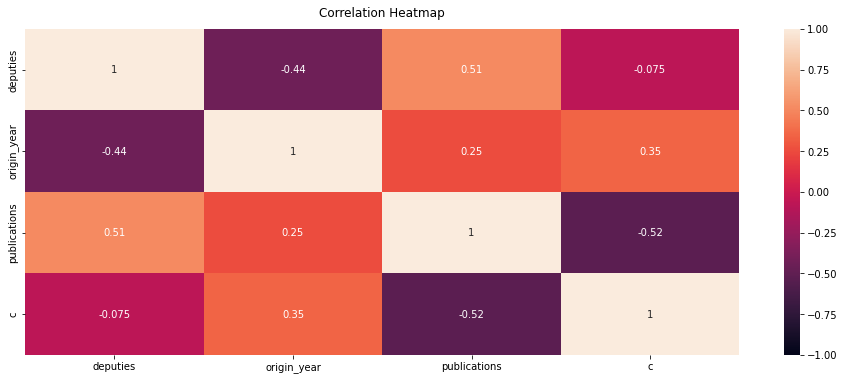

In [38]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(parties_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Ogólne wnioski:
- im starsza partia, tym więcej eurodeputowanych (-0.44)
- im więcej deputowanych, tym więcej publikacji (0.51)
- im starsza organizacja, tym więcej publikacji (0.25)
Eksperyment ten był przeprowadzony na bardzo małej grupie badanych, więc wyników nie można przełożyć na ogół organizacji (co byłoby zresztą trudne ze względu na konieczność przypisywania danych ręcznie (rok powstania i nakierowanie lewicowe/prawicowe).

### Histogram

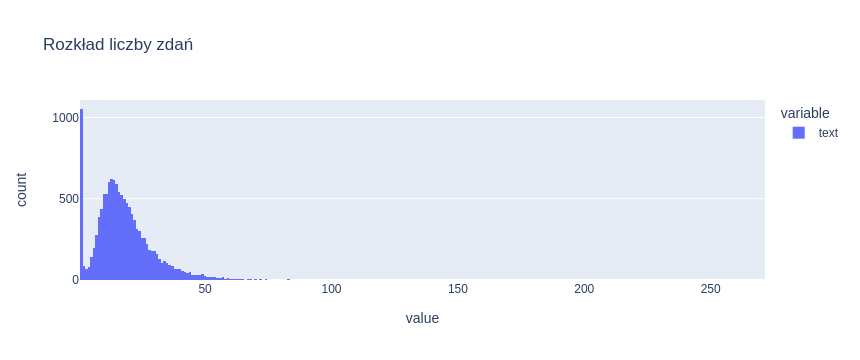

In [39]:
a = df.text.apply(lambda x: textstat.sentence_count(x)) #złożyć te 3 w jedną funkcję i po prostu wywołać
px.histogram(a, title = 'Rozkład liczby zdań')

Rozkład normalny.

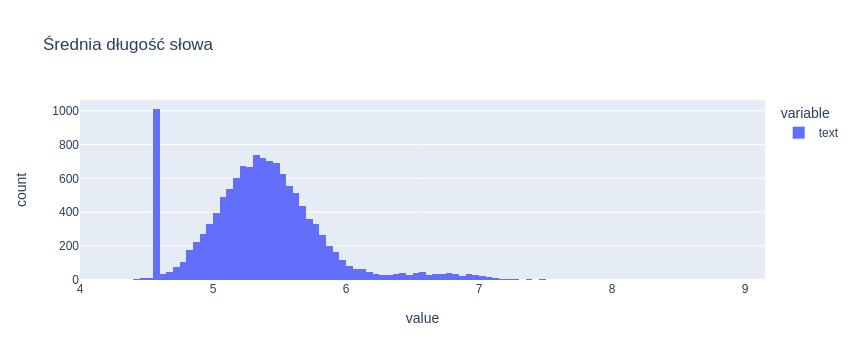

In [40]:
a = df.text.apply(lambda x: textstat.letter_count(x, ignore_spaces=True) / textstat.lexicon_count(x, removepunct=True)) #średnia długość
px.histogram(a, title = 'Średnia długość słowa')

Rozkład ten przypomina rozkład `gamma`.

### Korelacje


-    ADJ: adjective, e.g. big, old, green, incomprehensible, first
-    ADV: adverb, e.g. very, tomorrow, down, where, there
-    INTJ: interjection, e.g. psst, ouch, bravo, hello
-    NOUN: noun, e.g. girl, cat, tree, air, beauty
-    NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
-    PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
-    SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 😝
-    VERB: verb, e.g. run, runs, running, eat, ate, eating

- sents_count: liczba zdań
- ents_count: liczba nazw własnych

- polarity [-1,1]: -1 defines a negative sentiment and 1 defines a positive sentiment
- subjectivity [0,1]: quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

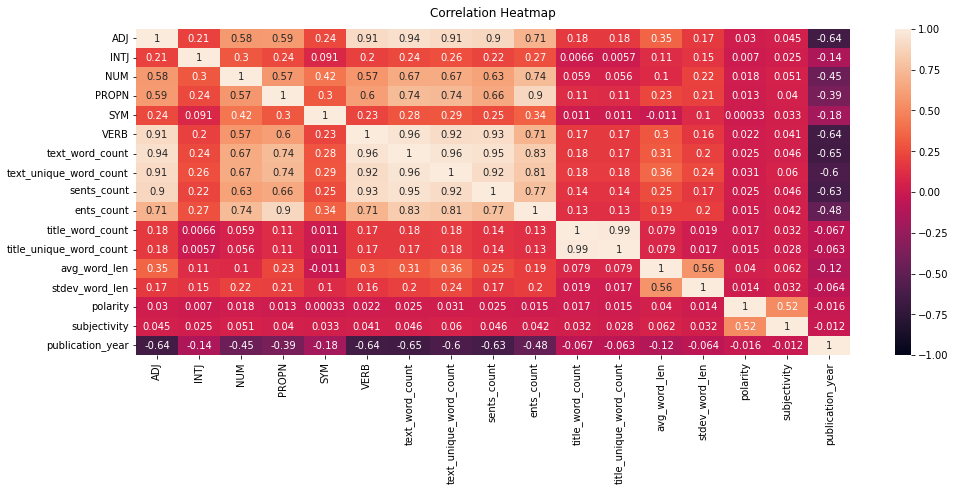

In [41]:
count_matrix = pd.read_table('dokorelacji-3.csv', sep=',', index_col = 0)
count_matrix.drop(['CONJ','X','SPACE','ADV','AUX','CCONJ','DET','PART','PRON','PUNCT','SCONJ'], inplace=True, axis=1)
count_matrix['publication_year'] = df.year
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(count_matrix.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

1. `ADJ` (przymiotnik): 
- Słabo skorelowany z `title_word_count` (0.18) - wskazuje to na to, iż tytuły definiowane są bardzo rzeczowo, bez zbędnego wdawania się w opisy (przy pomocy przymiotników).

2. `polarity` (zabarwienie negatywne/pozytywne):
- Mocno skorelowany (0.52) z `subjectivity`- im więcej opinii zawiera tekst, tym jest oceniany na bardziej pozytywny.

3. `publication_year` (data publikacji dokumentu):
- Mocno skorelowany ujemnie (-0.65) z `text_word_count`, co wskazuje na to, że im później publikowany dokument, tymm mniej słów zawiera, czyli na przestrzeni lat dokumenty stają się coraz krótsze.

4. `avg_word_len` (średnia długość słowa):
- Mocno skorelowana (0.36) z `text_(unique_)word_count`, co świadczy o tym, że im więcej słów w tekście, tym też słowa te są dłuższe. 

@TODO - wybrać podzbiór

### Preprocessing

In [42]:
df['lang']=df['text'].swifter.apply(detect)

Pandas Apply:   0%|          | 0/12995 [00:00<?, ?it/s]

Przy okazji plot ile jest notek w poszczególnych językach

<AxesSubplot:>

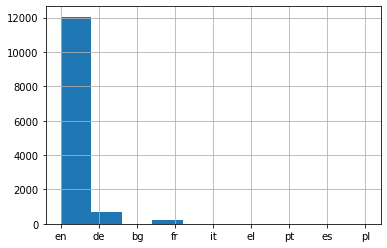

In [43]:
df['lang'].hist()

Dla 10 najczęściej publikujący organizacji sprawdzamy w jakich językach pisały.

In [44]:
import seaborn as sns

In [45]:
df_nawszelki = df.copy()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S&amp;D - Socialists &amp; Democrats in the European Parliament'),
  Text(1, 0, 'DIE LINKE. im Europaparlament'),
  Text(2, 0, 'PES - Party of European Socialists'),
  Text(3, 0, 'ACCA'),
  Text(4, 0, 'ALDE - Alliance of Liberals and Democrats for Europe'),
  Text(5, 0, 'NABU - Nature and Biodiversity Conservation Union'),
  Text(6, 0, 'GUE/NGL Group in the EP'),
  Text(7, 0, 'THE GREENS/EUROPEAN FREE ALLIANCE'),
  Text(8, 0, 'EPP Group in the European Parliament'),
  Text(9, 0, 'IRU - International Road Transport Union')])

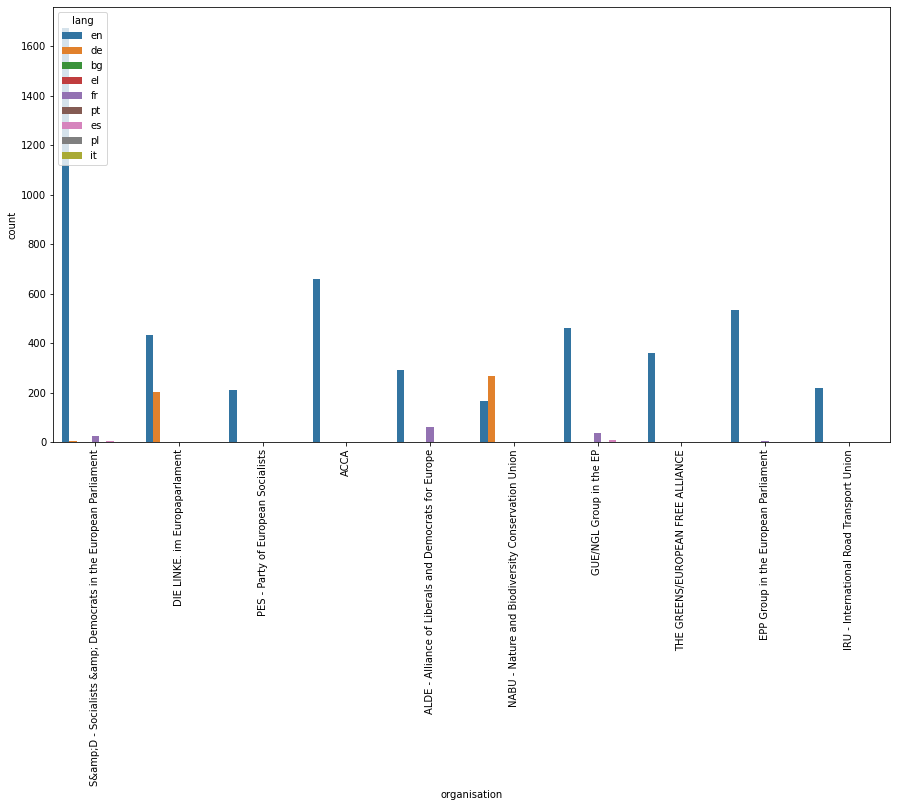

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_nawszelki.loc[df_nawszelki['organisation'].isin(list(df_nawszelki['organisation'].value_counts().head(10).index))],
              x='organisation',
              hue='lang')
plt.xticks(rotation=90)


In [47]:
df_pol = df.loc[df['lang']=='pl']

In [48]:
df = df.loc[df['lang']=='en']

In [49]:
df = df.drop(['lang'], axis=1)

In [50]:
import re

In [51]:
#df.date = pd.to_datetime(df.date)
df = df.drop_duplicates()
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: x.replace('\r\n\r\n',''))
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: re.sub('\w*\d\w*','', x)) # usuwamy cyfry
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: re.sub('http','', x))
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: re.sub('www','', x))
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: x.replace('+',''))
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: x.replace('tel',''))
df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x: x.replace('Tel',''))

In [52]:
df.date = pd.to_datetime(df.date,utc=True)

In [53]:
years = pd.DatetimeIndex(df['date']).year

In [54]:
df['year'] = years

In [55]:
#df = df.drop(['year'],axis=1)

#### Usunięcie wielokrotnie powtarzającego się tekstu

In [56]:
df.nunique()

title           11925
text            11017
organisation      824
date             6054
category          944
year               15
dtype: int64

In [57]:
df = df.loc[df.text.apply(lambda x: x != 'You must have JavaScript enabled to use this form.')]

Mamy przypadki identycznych tekstów z różnymi tytułami 

In [58]:
print(len(df))
print(df.nunique())
print("Liczba artukułów o tym samym tekście:",sum(list(map(lambda x: x > 1, list(df.text.value_counts())))))

11044
title           10932
text            11016
organisation      804
date             5933
category          921
year               15
dtype: int64
Liczba artukułów o tym samym tekście: 27


#### Przykład identycznych tekstów

In [59]:
sample_identical = df.text.value_counts().index[0]
df_identical = df.loc[df.text == sample_identical]
df_identical

title  \
8496  Peace initiative on Kurdish issue aims to kick...   
8642  Peace initiative on Kurdish issue aims to kick...   
8644  Peace initiative on Kurdish issue aims to kick...   

                                                   text  \
8496  Representatives of the Dalai Lama and Desmond ...   
8642  Representatives of the Dalai Lama and Desmond ...   
8644  Representatives of the Dalai Lama and Desmond ...   

                 organisation                      date  \
8496  GUE/NGL Group in the EP 2013-02-06 07:31:28+00:00   
8642  GUE/NGL Group in the EP 2012-12-04 07:32:54+00:00   
8644  GUE/NGL Group in the EP 2012-12-03 14:46:32+00:00   

                                               category  year  
8496       EnlargementEU Priorities 2020Regional Policy  2013  
8642            EU Priorities 2020Global EuropeSecurity  2012  
8644  EU Priorities 2020Global EuropeJustice & Home ...  2012

Sugerowane wyjaśnienie:

Walcząc z nacjonalistycznym gniewem, Erdogan (turecki prezydent) wprowadził wstępne reformy dotyczące praw Kurdów, a w 2012 r. rozpoczął negocjacje, aby spróbować zakończyć partyzantkę PKK, która od 1984 r. zabiła 40 000 ludzi. Kruche zawieszenie broni obowiązywało od marca 2013 r. Być może dokument ten był publikowany dla przypomnienia w ważniejszych momentach tychże działań.



In [60]:
count_identical = pd.DataFrame(df.text.value_counts())
count_identical = count_identical.loc[count_identical.text > 1,:]
count_identical
df_identical = df.loc[df.text.apply(lambda x: x in count_identical.text)]
df_identical

title  \
22     CSRD: European Parliament’s vote promotes an o...   
23     PRESS RELEASE - CSRD: European Parliament’s vo...   
28               Ukrainians Facing Another Deadly Threat   
29               Ukrainians Facing Another Deadly Threat   
48     Joint statement IPA Europe – European Dairy As...   
51     Joint statement IPA Europe – European Dairy As...   
63     Wealthy Russians linked to Putin must be strip...   
67     Wealthy Russians linked to Putin must be strip...   
78     S&Ds in Hungary to promote democracy and socia...   
85     S&Ds in Hungary to promote democracy and socia...   
102    EU data confirms key contribution of biomethan...   
155    EU data confirms key contribution of biomethan...   
339    S&D MEPs denounce Ortega for turning Nicaragua...   
372    S&D MEPs denounce Ortega for turning Nicaragua...   
776    Time to act on digital taxation and a global m...   
787    Time to act on digital taxation and a global m...   
2698       Two Candidates from the People for the People   
2700        European Left: TWO CANDIDATES FOR THE PEOPLE   
4798   Pittella: Rule of law should not serve politic...   
4801   Pittella: Rule of law should not serve politic...   
5924   Business as usual – Juncker snubs environment ...   
5934   Business as usual – Juncker snubs environment ...   
7605   Troika is not the scapegoat - Parliament calls...   
7606                     Europe steps up its IT security   
8496   Peace initiative on Kurdish issue aims to kick...   
8642   Peace initiative on Kurdish issue aims to kick...   
8644   Peace initiative on Kurdish issue aims to kick...   
8934   World Water Week 2012: « Water and Food Securi...   
8935   World Water Week 2012: « Water and Food Securi...   
9719   White Paper on Transport: Encourage a sustaina...   
9727   White Paper on Transport: Encourage a sustaina...   
10768                          Time for a safe fair ride   
10775                          Time for a safe fair ride   
12060  COPA-COGECA welcome agricultural council meeti...   
12061  COPA-COGECA welcome agricultural council meeti...   
12122                                       FP7 - Health   
12127                                       FP7 - Health   
12258  CEEP Statement on the (future) Review of EU Te...   
12277  CEEP Statement on the (future) Review of EU Te...   
12462  For a horizontal alignment of sectoral product...   
12463  For a horizontal alignment of sectoral product...   
12464    Cross border European accreditation in practice   
12465    Cross border European accreditation in practice   
12469         Cable Industry Revenues Exceed €18 billion   
12470         Cable Industry Revenues Exceed €18 billion   
12504  IRU City Trophy 2009 to reward municipal coach...   
12505  IRU City Trophy 2009 to reward municipal coach...   
12506  IRU to reward service quality and accessibilit...   
12507  IRU to reward service quality and accessibilit...   
12830          Does better health lead to better wealth?   
12831          Does better health lead to better wealth?   
12921  GUE/NGL voices its opposition to the return di...   
12922  GUE/NGL voices its opposition to the return di...   
12985  New energy and climate package for Europe: The...   
12986  New energy and climate package for Europe: The...   

                                                    text  \
22     Brussels,  March  - TIC Council welcomes the E...   
23     Brussels,  March  - TIC Council welcomes the E...   
28     Brussels,  March : Since the Russian invasion ...   
29     Brussels,  March : Since the Russian invasion ...   
48     The European Dairy Association (EDA) and the I...   
51     The European Dairy Association (EDA) and the I...   
63     The S&D Group in the European Parliament suppo...   
67     The S&D Group in the European Parliament suppo...   
78     As part of the Conference on the Future of Eur...   
85     As part of the Conference on the Future of Eur...   
102    The statistical office 

Wnioski:
- daty publikacji identycznych notek mogą być różne
- tytuły są identyczne lub bardzo podobne - np. `CSRD: European Parliament’s...`, `PRESS RELEASE - CSRD: European Parliament’s...`
- podobnie organizacje - często różnią się rozwinięciem skrótu w nawiasach

#### Krótka analiza `polskich` tekstów

In [61]:
en = spacy.load("en_core_web_sm")

In [62]:
df_pol

title  \
5240  Silesia deserves autonomy and Poland should gr...   
6834  “No one should face jail for abortion” say S&D...   

                                                   text  \
5240  General Assembly of European Free Alliance-Eur...   
6834  S&D Euro MPs are outraged by plans to impose a...   

                                           organisation  \
5240                      EFA - European Free Alliance    
6834  S&amp;D - Socialists &amp; Democrats in the Eu...   

                           date  \
5240  2017-03-31 00:00:00+02:00   
6834  2016-04-08 00:00:00+02:00   

                                               category  year lang  
5240  Global EuropeLanguages & CultureSocial Europe ...  2017   pl  
6834                             Justice & Home Affairs  2016   pl

In [63]:
df_pol
pol_doc = en(df_pol.iloc[0,1])
print("Tytuł artykułu:", df_pol.iloc[0,:].title)
print("Data artykułu:", df_pol.iloc[0,:].date)
print("Organizacja:", df_pol.iloc[0,:].organisation)

Tytuł artykułu: Silesia deserves autonomy and Poland should grant it
Data artykułu: 2017-03-31 00:00:00+02:00
Organizacja: EFA - European Free Alliance 


In [64]:
spacy.displacy.render(pol_doc, style='ent',jupyter=True) 

**Ważny wniosek: Teksty potrafią być w 2 wersjach językowych**
##### Hipoteza: teksty w 2 wersjach językowych zawierają słowo 'below'

### Usunięcie informacji kontaktowych
Niektóre z publikowanych notek zawierały opis organizacji. Zebraliśmy słowa typowe dla końca notki prasowej danej organizacji,
aby odfiltrować zbędne informacje

In [65]:
sum(df.title.apply(lambda x: 'below' in x))

1

Wniosek: Jednak tylko 1 taki dokument zawieraja w tytule słowo 'below'.

In [66]:
import copy

In [67]:
def delete_contact(df):
    cpdf = copy.deepcopy(df)
    separators = ['About ACCA', 'For further information', 'Press Contact', 'Richard More O\'Ferrall', 'please contact', '* * *', 'please contact', 'please contact']
    orgs = ['ACCA', 'EPP Group in the European Parliament', 'GUE/NGL Group in the EP', 'THE GREENS/EUROPEAN FREE ALLIANCE',
       'ALDE - Alliance of Liberals and Democrats for Europe', 'IRU - International Road Transport Union', 'PES - Party of European Socialists', 'CEEP - European Centre of Employers and Enterprises providing public services']
    sep2 = ['For media enquiries', 'For more information', 'For further information']
    orgs2 = ['ACCA', 'ALDE - Alliance of Liberals and Democrats for Europe', 'CEEP - European Centre of Employers and Enterprises providing public services']

    for i in range(len(separators)):
        df_acca_text = cpdf.loc[cpdf.organisation == orgs[i], 'text'].apply(lambda x: x.split(separators[i], 1)[0])
        cpdf.loc[cpdf.organisation == orgs[i], 'text'] = df_acca_text
    for i in range(len(sep2)):
        df_acca_text = cpdf.loc[cpdf.organisation == orgs2[i], 'text'].apply(lambda x: x.split(sep2[i], 1)[0])
        cpdf.loc[cpdf.organisation == orgs2[i], 'text'] = df_acca_text
    
    return cpdf

EPP Group - zbiasowane o 453 


In [68]:
df = delete_contact(df)

# Eksploracja

In [69]:
docs = df['text'].swifter.apply(en)

Pandas Apply:   0%|          | 0/11044 [00:00<?, ?it/s]

In [70]:
len(docs)

11044

## Wordclouds

In [71]:
lemmas = docs.swifter.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct])

Pandas Apply:   0%|          | 0/11044 [00:00<?, ?it/s]

In [72]:
from collections import Counter
import itertools

Wszystkie słowa

Najpierw tworzymy funkcje to utworzenia słownika z liczbami wystąpień danych lematów(i usuwania n najczęstszych), do wyświetlania n najczęstszych i do plotowania wordclouda

In [73]:
def createCounterDeleteMostCommon(lemmas, n): #lemmas - lista lematów, n - ilość usuwanych najczęstszych słów
  word_counts = Counter(list(itertools.chain(*lemmas)))
  wordcountsDf = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
  wordcountsDf.columns=['word','count']
  for x in list(wordcountsDf.sort_values('count',ascending=False).head(n)['word']):
    del word_counts[x]
  return word_counts

In [74]:
def viewMostCommon(lemmas,n): #lemmas - lista lematów, n - ilość wyświetlanych pozycji
  word_counts = Counter(list(itertools.chain(*lemmas)))
  wordcountsDf = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
  wordcountsDf.columns=['word','count']
  print(wordcountsDf.sort_values('count',ascending=False).head(n))


In [75]:
def createWc(word_counter): #word_counter - słownik z ilościami wystąpień słów
  wc = WordCloud(width=800, height=400)
  wc.generate_from_frequencies(frequencies=word_counter)
  plt.figure(figsize=(10,8))
  plt.imshow(wc)

In [76]:
viewMostCommon(lemmas,10)

           word  count
143              46666
40     European  27059
37           EU  26483
104      Europe  21852
258    european  15777
381         new  11932
19         need  11882
42   Commission  11098
254    industry  10433
248      energy   9620


Usuwamy pierwsze 2 wartości i synonimy Europy

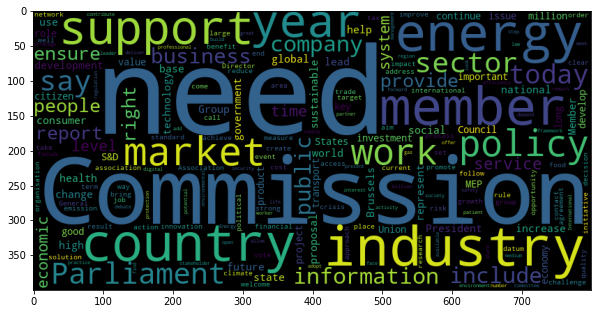

In [77]:
createWc(createCounterDeleteMostCommon(lemmas,6))

Tylko rzeczowniki

In [78]:
nouns = docs.swifter.apply(lambda doc: [token.lemma_
         for token in doc
         if not token.is_stop
         if not token.is_punct
         if token.pos_ == 'NOUN'])

Pandas Apply:   0%|          | 0/11044 [00:00<?, ?it/s]

Usuwamy 10 najczęstszych. Tak samo robimy dla czasowników i przysłówków.


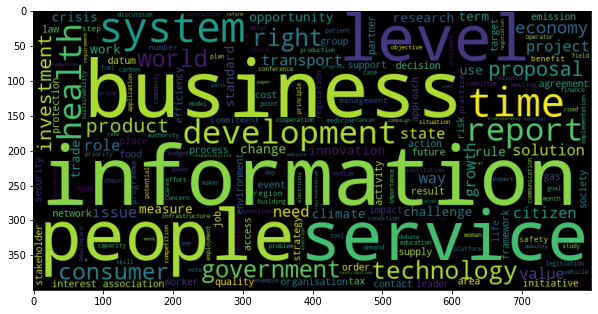

In [79]:
createWc(createCounterDeleteMostCommon(nouns,10))

Czasowniki

In [80]:
verbs = docs.swifter.apply(lambda doc: [token.lemma_
         for token in doc
         if not token.is_stop
         if not token.is_punct
         if token.pos_ == 'VERB'])

Pandas Apply:   0%|          | 0/11044 [00:00<?, ?it/s]

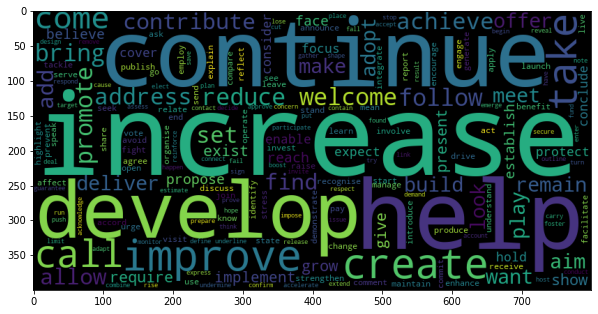

In [81]:
createWc(createCounterDeleteMostCommon(verbs,10))

Przysłówki

In [82]:
adverbs = docs.swifter.apply(lambda doc: [token.lemma_
         for token in doc
         if not token.is_stop
         if not token.is_punct
         if token.pos_ == 'ADV'])

Pandas Apply:   0%|          | 0/11044 [00:00<?, ?it/s]

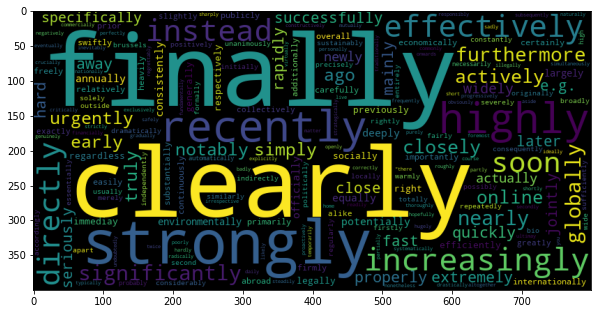

In [83]:
createWc(createCounterDeleteMostCommon(adverbs,10))

Jak się zmieniały słowa przez lata

In [84]:
docs_year=pd.DataFrame(zip(docs,list(years)))
docs_year.columns=['doc', 'year']

In [85]:
lemmas2022 = docs_year.loc[docs_year['year']==2021].iloc[:,0].swifter.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct])

Pandas Apply:   0%|          | 0/879 [00:00<?, ?it/s]

In [86]:
lemmas2008 = docs_year.loc[docs_year['year']==2008].iloc[:,0].swifter.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct])

In [87]:
viewMostCommon(lemmas2022,10)

           word  count
156               3121
77           EU   2598
0      European   2182
92       Europe   1958
47     european   1206
554        need   1181
56          new   1018
350  Commission    982
69      support    976
412    industry    917


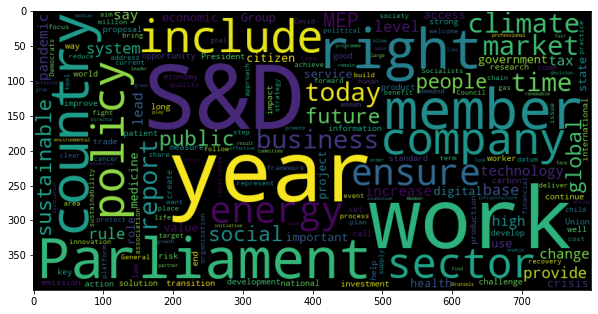

In [88]:
createWc(createCounterDeleteMostCommon(lemmas2022,10))

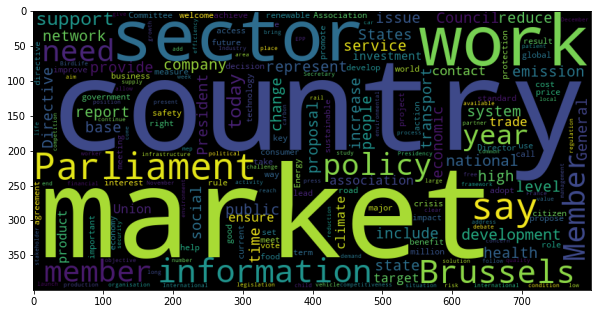

In [ ]:
createWc(createCounterDeleteMostCommon(lemmas2008,10))

Widzimy, że po usunięciu najpopularniejszych słow(comission i synonimów Europy) najczęstsze słowa w 2008 i 2021 się dość mocno różnią.

## Analiza n-gramów

In [89]:
def tokenize(df_text):
    all_tokens = []
    for doc in df_text:
        tokens = [token for token in doc if not token.is_punct and not token.is_space]
        all_tokens.append(tokens)
    return all_tokens

In [90]:
def create_bigrams_trigrams(all_tokens):
    all_tokens_flat = [s for S in all_tokens for s in S]
    bgrams = ngrams(all_tokens_flat, 2)
    tgrams = ngrams(all_tokens_flat, 3)
    bigrams = []
    trigrams = []
    for t1, t2 in bgrams:
        if not t1.is_stop and  not t2.is_stop:
            bigrams_1 = (str(t1), str(t2))
            bigrams.append(bigrams_1)

    for t1, t2, t3 in tgrams:
        if not t1.is_stop and  not t2.is_stop and not t3.is_stop:
            tigrams_1 = (str(t1), str(t2), str(t3))
            trigrams.append(tigrams_1)
    return bigrams, trigrams


In [91]:
all_tokens = tokenize(docs)

In [92]:
[bigrams, trigrams] = create_bigrams_trigrams(all_tokens)

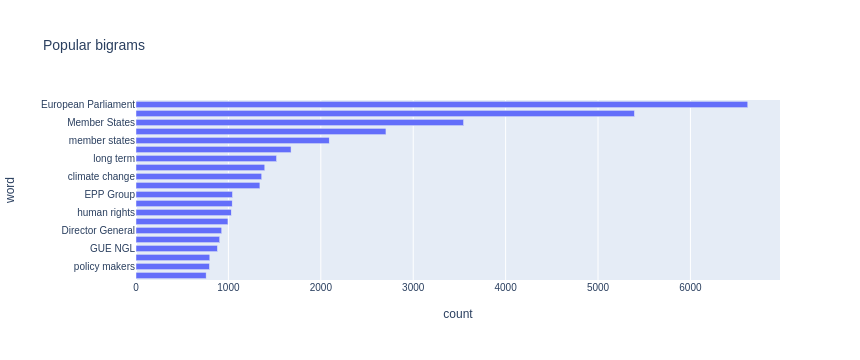

In [93]:
counts_bi = pd.DataFrame(Counter(bigrams).most_common(20), columns=['word', 'count'])
counts_bi.loc[:,'word'] = counts_bi.loc[:,'word'].apply(lambda x: str(x[0])+' '+ str(x[1]))
fig = px.bar(counts_bi,orientation='h', y='word', x='count', title = 'Popular bigrams')

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})
fig

Najpopularniejsze bigramy dotyczą Unii Europejskiej- parlamentu, komisji, krajów członkowskich oraz poszczególnych stanowisk. 
Pozostałe:
- `S&D Group` - Postępowy Sojusz Socjalistów i Demokratów w Parlamencie Europejskim, socjaldemokratyczna grupa polityczna w Parlamencie Europejskim VII kadencji, powołana faktycznie 23 czerwca 2009
- `EPP Group` - Grupa Europejskiej Partii Ludowej (Chrześcijańscy Demokraci), Od 1999 (tj. od V kadencji) jest największą grupą polityczną w PE (parlamencie). (Na końcu każdej z notek organizacji znajduje się nazwa -`EPP Group`, zatem w rzeczywistości wystąpień tego słowa jest o ok. 450 mniej)
- `long term` - prawdopodobnie w dokumentach dużo jest mowy o planach długoterminowych
- `Secretary General` - sekretarz generalny
- `climate change`, `energy efficiency` - kwestie klimatyczne i oszczędności energii najwyraźniej również były w dokumentach ważne
- `human rights`


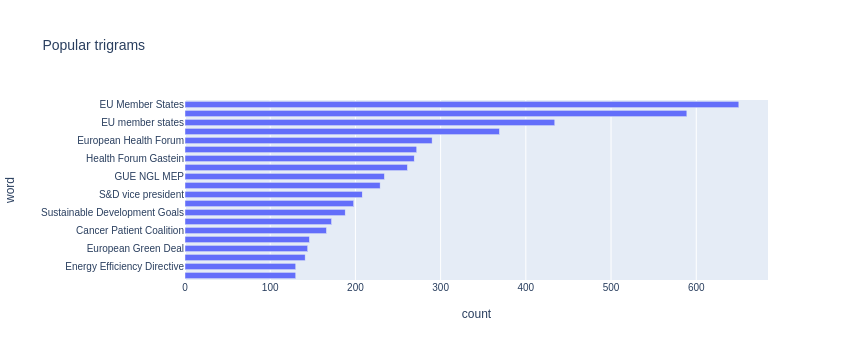

In [94]:
counts_tri = pd.DataFrame(Counter(trigrams).most_common(20), columns=['word', 'count'])
counts_tri.loc[:,'word'] = counts_tri.loc[:,'word'].apply(lambda x: str(x[0])+' '+ str(x[1])+ ' '+ str(x[2]))
fig = px.bar(counts_tri,orientation='h', y='word', x='count', title = 'Popular trigrams')

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})

Najpopularniejsze trigramy:
- `Chartered Certified Accountants`, zapewne od 'Association of Chartered Certified Accountants' - ACCA, czyli organizacji, która jest na II miejscu w liczebności publikowanych dokumentów
- `EU member states`, jak wyżej - dużo mowy o sprawach UE
- `European Health Forum Gastein` - wiodąca konferencja na temat polityki zdrowotnej w Europie

Text(0.5, 1.0, 'Rozkład tematów w poszczególnych latach')

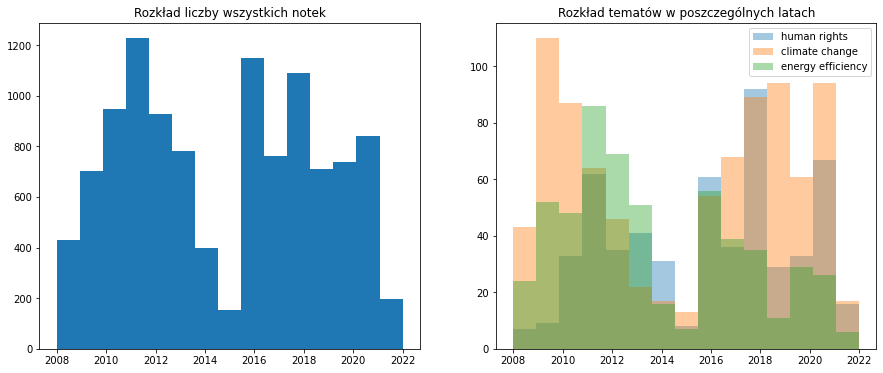

In [95]:
interesting = ['human rights', 'climate change', 'energy efficiency'] # zliczamy dokumenty, w których te tematy wystąpiły

fig, ax = plt.subplots(1, 2, figsize = (15, 6))

ax[0].hist(df.date.apply(lambda x: x.year), bins = 15)
ax[0].set_title("Rozkład liczby wszystkich notek")

for i in range(len(interesting)):
    is_present = df.text.apply(lambda x: interesting[i] in x)
    years = df.date[is_present].apply(lambda x: x.year)
    plt.hist(years, alpha = 0.4, label = interesting[i], bins = 15)
    plt.legend(loc='upper right')
plt.title("Rozkład tematów w poszczególnych latach")

W roku `2015` nastąpiło wyraźne obniżenie liczby publikowanych dokumentów. Może coś było nie tak ze stroną? (TODO). 
Obniżenie liczności nastąpiło również w roku 2022, ponieważ jesteśmy w jego trakcie. Możemy szacować, że skoro w ciągu dwóch pierwszych miesięcy roku 2022 opublikowanych zostało około 200 dokumentów, to w ciągu całego roku będzie to około 200*6=1200. Taki wynik byłby jednym z wyższych na przestrzni tych lat. Prawdopodobnie wynika to z trwającej wojny. 
Pik w roku 2011 mógł wynik z kilku ważnych wydarzeń owego roku: beatyfikacja Jana Pawła II, trzęsienie ziemi i katastrofa nuklearna w Japonii, zabicie bin Ladena, arabska wiosna, interwencja NATO w Libii, masakra na norweskiej wyspie Utoya, kryzys w straefie euro - to najważniejsze wydarzenia roku 2011 na świecie.

Na podstawie drugiego wykresu możemy wnioskować, że kluczowym tematem na przestrzeni lat były zmiany klimatyczne. Rok `2009` ?

### Analiza ngramów z podziałem na kategorie

In [96]:
popular_cat = list(df.category.value_counts().index)[0:10]
popular_cat

['InfoSociety',
 'Health & Consumers',
 'Euro & Finance',
 'Energy',
 'Social Europe & Jobs',
 'Transport',
 'Global Europe',
 'Climate & Environment',
 'Innovation & Enterprise',
 'Justice & Home Affairs']

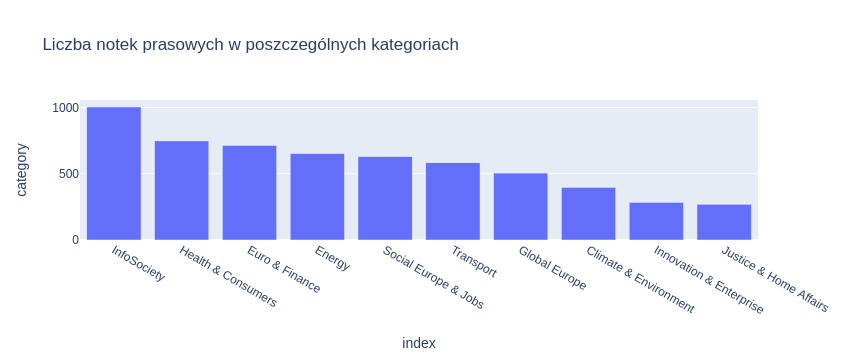

In [97]:
is_popular_org = df.category.apply(lambda x: x in popular_cat)
pop_org_text = pd.DataFrame(np.array(df)[is_popular_org]).iloc[:,[1,4]]
pop_org_text.columns = ['text', 'category']
categories_counted = pop_org_text.category.value_counts().reset_index()
px.bar(categories_counted, x = 'index', y = 'category', title ='Liczba notek prasowych w poszczególnych kategoriach')

Najczęściej poruszanym działem tematycznym jest `InfoSocieity`, czyli najwięcej jest dokumentów informacyjnych. 

In [98]:
popular_orgs = list(df.organisation.value_counts().index)[0:10]
perc = round(len(df.loc[df.organisation.apply(lambda x: x in popular_orgs)]) / len(df) * 100, 2)
print(f"Zauważmy, że ok {perc}% tekstów zostało opublikowaych przez 10 najpopularniejszych organizacji - w dalszej eksploracji skupimy się głównie na nich.")
popular_orgs

Zauważmy, że ok 42.91% tekstów zostało opublikowaych przez 10 najpopularniejszych organizacji - w dalszej eksploracji skupimy się głównie na nich.


['S&amp;D - Socialists &amp; Democrats in the European Parliament',
 'ACCA',
 'EPP Group in the European Parliament',
 'GUE/NGL Group in the EP',
 'THE GREENS/EUROPEAN FREE ALLIANCE',
 'ALDE - Alliance of Liberals and Democrats for Europe',
 'IRU - International Road Transport Union',
 'PES - Party of European Socialists',
 'CEEP - European Centre of Employers and Enterprises providing public services',
 "ETNO - European Telecommunications Network Operators\\' Association"]

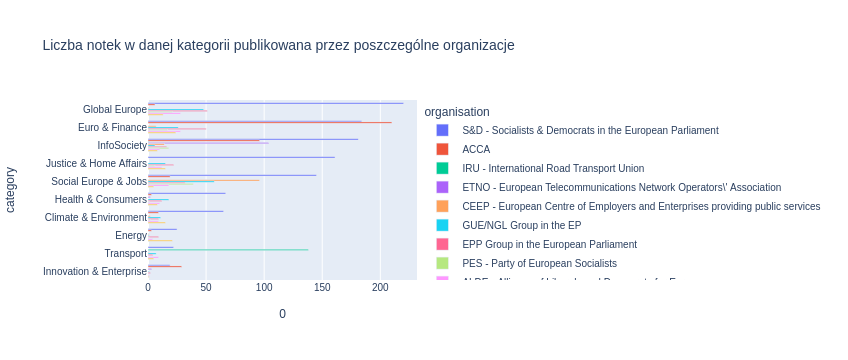

In [99]:
df_category_org = df.loc[df.category.apply(lambda x: x in popular_cat)]
df_category_org = df_category_org.loc[df_category_org.organisation.apply(lambda x: x in popular_orgs)]
df_category_org = df_category_org.groupby(['category', 'organisation']).value_counts().reset_index()
df_category_org = df_category_org.iloc[:,0:2]
df_category_org = pd.DataFrame(df_category_org.value_counts().reset_index())

fig = px.bar(df_category_org, x = 0, y = 'category', color='organisation', barmode='group', width = 1015, title='Liczba notek w danej kategorii publikowana przez poszczególne organizacje')
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})

Obserwacje:
1. Swój największy udział w dziedzinach `Climate & Environment`, `Health & Consumers`, `Social Europe & Jobs`, `Justice & Home Affairs`, `InfoSociety` oraz `Global Europe` miała S&D - Socialists & Democrats in the European Parliament (partia lewicowa), co zgadzałoby się z tematami zainteresowań partii właśnie lewicowej.

Nie zauważyłam żadnych odstępstw - organizacje zdają się przestrzegać wcześniej powziętej misji zajmowania się konkretnymi tematami ze swojego programu.


In [100]:
text_by_categories = pd.DataFrame(pop_org_text.groupby('category').text.sum())

In [101]:
def count_vectorize(text, names = [], ngram_range = (2, 2)):
    count_vectorizer = CountVectorizer(min_df = 10, stop_words='english', token_pattern = r"[a-zA-Z]{2,}", ngram_range=ngram_range)
    count_cat = count_vectorizer.fit_transform(text)
    count_feature_names = count_vectorizer.get_feature_names()
    df_count_org = pd.DataFrame(count_cat.toarray(), columns=list(count_feature_names))
    if names is not []:
        df_count_org.index = names
    return df_count_org 

In [102]:
def plot_ngrams_by_categories(df_org, drop_list =[]):
    fig, ax = plt.subplots(3, 3, figsize = (15, 7))

    categories = ['Climate & Environment', 'Energy', 'Euro & Finance', 'Global Europe',
           'Health & Consumers','InfoSociety', 'Innovation & Enterprise',
           'Justice & Home Affairs', 'Social Europe & Jobs', 'Transport']
    a = 0
    for i in range(3):
        for j in range(3):
            df_count_org = copy.deepcopy(df_org)
            df_count_org_loc = df_count_org.loc[categories[a]]
            df_count_org_loc = df_count_org_loc.drop(drop_list)
            counted = df_count_org_loc.sort_values(ascending = False)[0:5]
            counted = counted.sort_values()
            ax[i, j].barh(counted.index, counted)
            ax[i, j].set_title(categories[a])
            a = a+1
    plt.subplots_adjust(left=0.0,bottom=0.1, right=0.9, top=1, wspace=0.8, hspace=0.4)

In [103]:
bigrams_categories = count_vectorize(text_by_categories.text, text_by_categories.index)

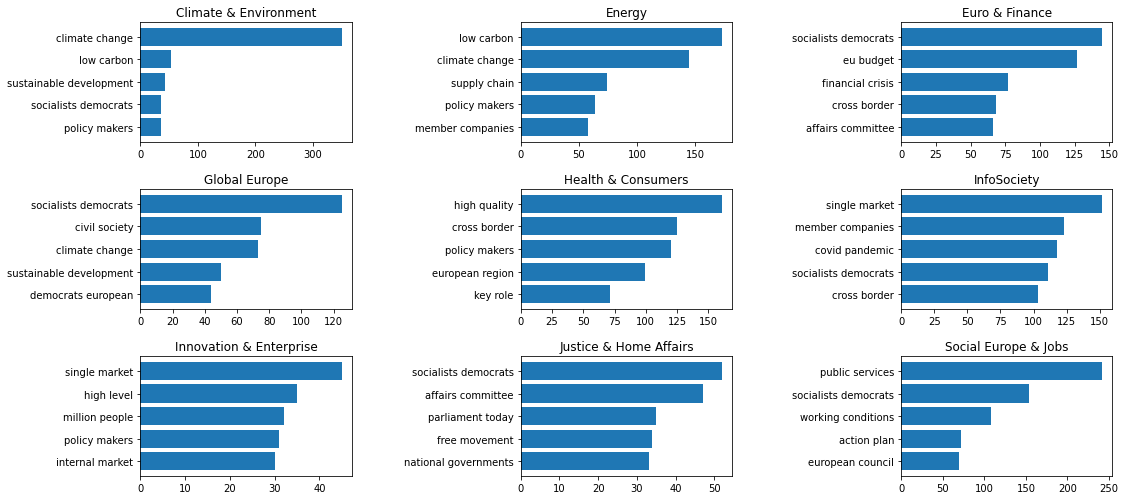

In [104]:
to_drop = ['member states', 'european commission', 'european parliament', 'european union', 'eu member', 'secretary general',
          'european countries', 'vice president', 'gue ngl', 'europa eu', 'member state', 'group european', 'long term', 'information contact']
plot_ngrams_by_categories(bigrams_categories, to_drop)

1. `Health & Consumers` - najczęściej pojawiającym się bigramem jest `high quality`. Prawdopodobnie dotyczy on opisu wysokiej jakości produktów i usług.

@TODO

## Tf-idf + wizualizacja (wagi słów)

In [105]:
def tfidf_vectorize(text_to_vectorize, popular_org_names, ngram_range=(1,1), min_df = 7, popular = True, drop_list = []):
    tfidf_vectorizer_org = TfidfVectorizer(min_df = min_df, use_idf=True, stop_words='english', token_pattern = r"[a-zA-Z]{2,}", ngram_range=ngram_range)
    tfidf_org_pop = tfidf_vectorizer_org.fit_transform(text_to_vectorize)
    tfidf_feature_names = tfidf_vectorizer_org.get_feature_names()
    df_tfidf_org = pd.DataFrame(tfidf_org_pop.toarray(), columns=list(tfidf_feature_names))
    df_tfidf_org.index = popular_org_names
    if drop_list:
        df_tfidf_org = df_tfidf_org.drop(drop_list, axis = 1)
    if popular:
        popular_words = list(df_tfidf_org.max(axis=0).sort_values(ascending = False)[0:20].index)
        df_tfidf_org = df_tfidf_org.loc[:, popular_words]
    
    return df_tfidf_org

In [106]:
is_popular_org = df.organisation.apply(lambda x: x in popular_orgs)
pop_org_text = pd.DataFrame(np.array(df)[is_popular_org]).iloc[:,1:3]
pop_org_text.columns = ['text', 'organisation']
text_by_organisations = pd.DataFrame(pop_org_text.groupby('organisation').text.sum())

In [107]:
df_tfidf_org = tfidf_vectorize(text_by_organisations.text, list(text_by_organisations.index))
df_tfidf_bi = tfidf_vectorize(text_by_organisations.text, list(text_by_organisations.index), ngram_range = (2, 2))

In [108]:
def plot_heatmap(df_tfidf_org, title = "Mapa ciepła tf-idf", fig_size = (15, 20)):
    orgs = df_tfidf_org.index
    words = df_tfidf_org.columns

    fig, ax = plt.subplots(figsize = fig_size)
    im = ax.imshow(df_tfidf_org)

    ax.set_xticks(np.arange(len(words)), labels=words)
    ax.set_yticks(np.arange(len(orgs)), labels=orgs)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(len(orgs)):
        for j in range(len(words)):
            text = ax.text(j, i, round(df_tfidf_org.iloc[i, j],3),
                           ha="center", va="center", color="w")
    ax.set_title(title, fontsize = 15)
    fig.tight_layout()
    plt.show()

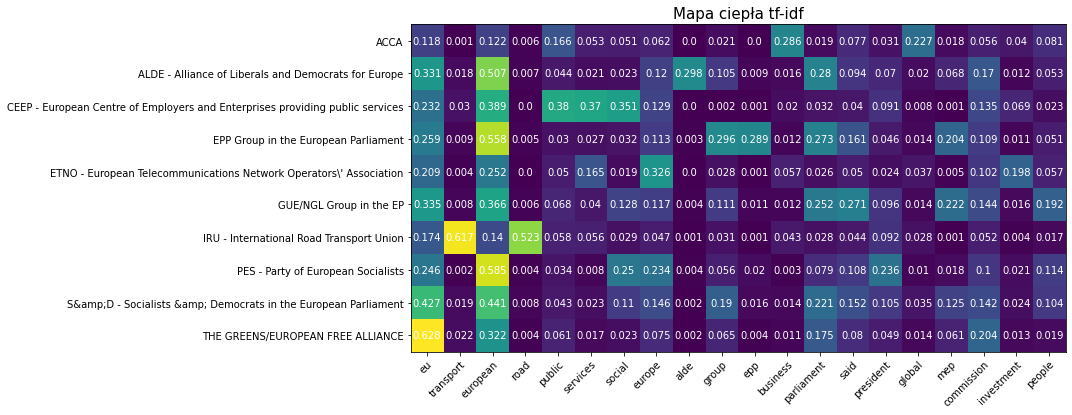

In [109]:
plot_heatmap(df_tfidf_org)

Charakterystyka słów dla:
- `S&D Group` ważne słowa: `buisness`
- `ACCA` ważne słowa: `eu`, `european`, `ALDE`- Porozumienie Liberałów i Demokratów na rzecz Europy (frakcja w Parlamencie Europejskim)
- `IRU` ważne słowa: `transport`, `road` - ma sens, bo to organizacja transportowa
itd.

Generalnie najważniejsze dla większości organizacji były: `eu`, `european`.

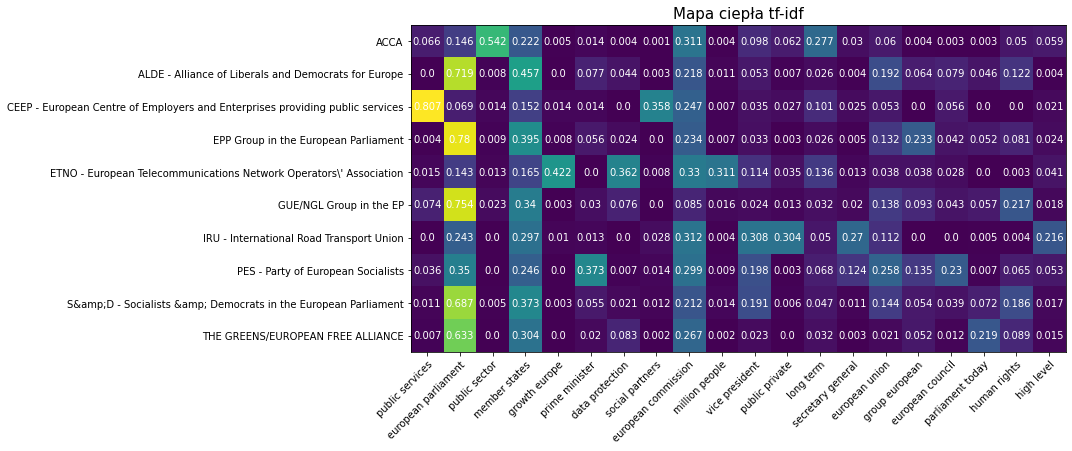

In [110]:
plot_heatmap(df_tfidf_bi)

Ważkość bigramów:
- `ACCA` ważne bigramy: `european parliament`, `information contact`

Generalnie najważniejsze bigramy to: `european parliament`, `member states`, `european commission`, co potwierdza uprzednio pokazaną liczność tychże słów w dokumentach.

TODO: tutaj i w poprzednim można by więcej opisać.

### Analiza ze względu na lata i kategorie
Aby skupić się na analizie słów istotnych dla danego obszaru tematycznego, dodaliśmy wykres z liczbą wystąpień w danej kategorii na osi x oraz liczbą wystąpień ogółem na osi y.  
Mapa ciepła (funkcja `tfidf_vectorize`) ma dodatkowy argument - `drop_list`, do której można dodawać wyrażenia, które są wspólne dla większości kategorii.

In [111]:
bigrams_categories = bigrams_categories.drop(['european parliament', 'member states', 'european commission', 'european union', 'information contact'], axis = 1)

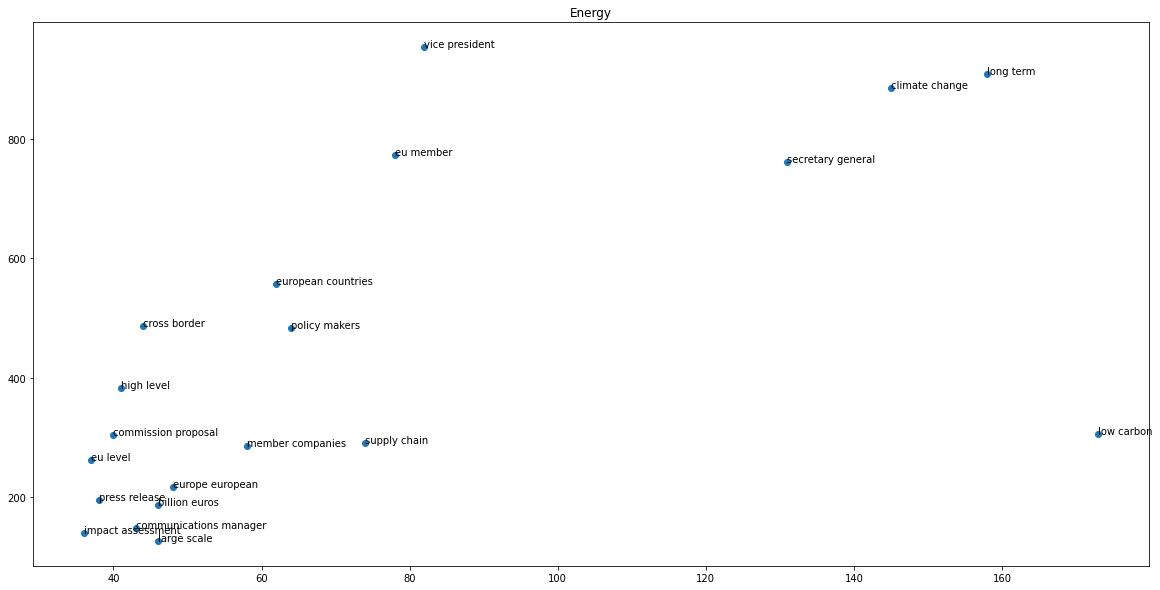

In [112]:
def check_importance(df_count_org, num):
    """Kolejność alfabetyczna: 0-'Climate & Environment', 1-'Energy', 2-'Euro & Finance', 3-'Global Europe', 4-'Health & Consumers'
    5-'InfoSociety', 6-'Innovation & Enterprise', 7-'Justice & Home Affairs', 8-'Social Europe & Jobs', 9-'Transport'"""

    text_freq = df_count_org.iloc[num,:].sort_values(ascending = False)[0:20]
    labels = list(text_freq.index)
    document_freq = df_count_org.sum(axis = 0).loc[labels]

    fig, ax = plt.subplots(figsize = (20, 10))
    plt.scatter(text_freq, document_freq)
    plt.title(df_count_org.index[num])

    for i, txt in enumerate(labels):
        ax.annotate(txt, (text_freq[i], document_freq[i]))

check_importance(bigrams_categories, 1)

Z wykresu można odczytać, że istotnie (jak to wynikało już z bigramów) dla kategorii `Energy` charakterystycznym wyrażeniem jest `low carbon`, czyli `niska emisja`. Świadczy to o podejmowaniu tematu oszczędności źródeł energii. Ma to sens ze względu na ograniczenia zasobów występujących na Ziemi.

Jest również podejmowany temat zmian klimatycznych, jedakże `climate change` jest wyrażeniem charakterystycznym również wśród innych kategorii.

In [113]:
def tfidf_categories(number):
    df_one_cat = df.loc[df.category == popular_cat[number]]
    df_one_cat = df_one_cat.iloc[:,[1,5]]
    text_by_cat_years = pd.DataFrame(df_one_cat.groupby('year').text.sum())
    return text_by_cat_years

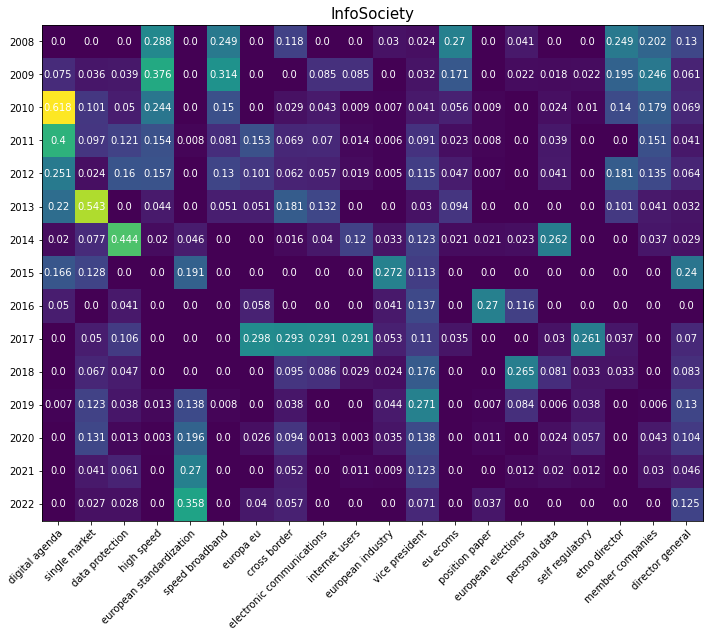

In [114]:
universal_drop_list = ['european parliament', 'member states', 'european commission', 'european union']
text_by_cat_years = tfidf_categories(0)
df_tfidf_cat = tfidf_vectorize(text_by_cat_years.text, list(text_by_cat_years.index), ngram_range = (2, 2), drop_list = universal_drop_list)
plot_heatmap(df_tfidf_cat, title = popular_cat[0], fig_size = (10, 10))

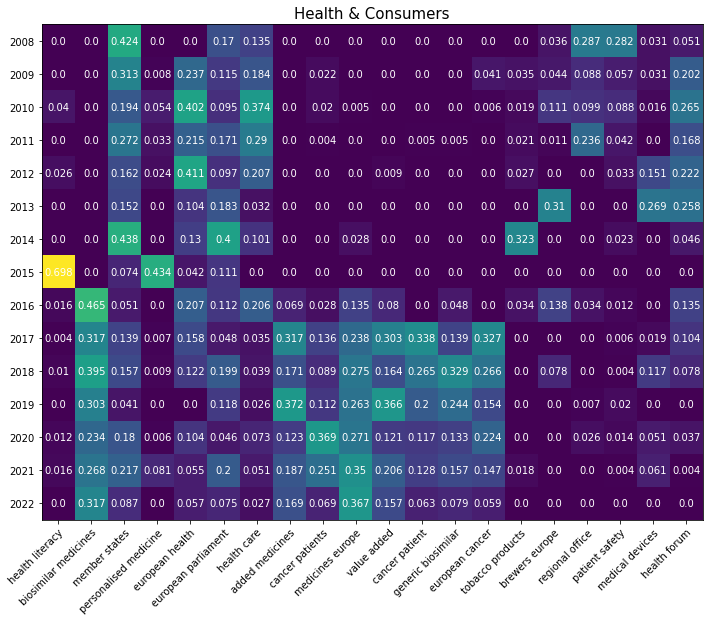

In [115]:
text_by_cat_years = tfidf_categories(1)
df_tfidf_cat = tfidf_vectorize(text_by_cat_years.text, list(text_by_cat_years.index), ngram_range = (2, 2))
plot_heatmap(df_tfidf_cat, title = popular_cat[1], fig_size = (10, 10))

Ciekawe:
- Temat wiedzy o zdrowiu (`health literacy`) w latach 2008-2014 oraz 2016-2022 był praktycznie nieobecny w dokumentach, a w roku 2015 nagle odnotowano duży wzrost. Jak to wyjaśnić? Nie wiadomo.
- O `biosimilar medicines` (biologic medical product that is almost an identical copy of an original product that is manufactured by a different company) zaczęto pisać od 2016 roku. Pierwszy biosimilar został zatwierdzony przez UE w 2015r. (jako jedyny w tymże roku), w następnych latach corocznie zatwierdzano ich co niemiara.
- Wzmożone zainteresowanie `tobacco products` nastapiło w 2014 r. Wtedy też został wydany dokument regulujący prawa związane z wytwarzaniemm prezentowaniem i sprzedażą wyrobów tytoniowych i wyrobów pokrewnych wśród państw członkowskich.
- ...

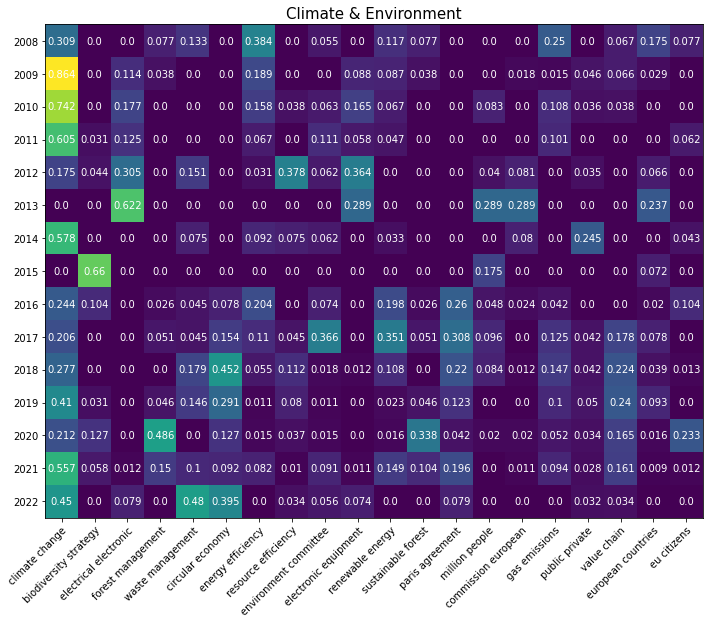

In [116]:
drop_list = ['european parliament', 'member states', 'european commission', 'european union', 'europa eu', 'eu member']
text_by_cat_years = tfidf_categories(7)
df_tfidf_cat = tfidf_vectorize(text_by_cat_years.text, list(text_by_cat_years.index), ngram_range = (2, 2), drop_list = drop_list)
plot_heatmap(df_tfidf_cat, title = popular_cat[7], fig_size = (10, 10))

Wnioski:
- w roku 2020 charakterystycznym tematem była **gospodarka leśna** - wtedy miał miejsce pożar Amazonii
- temat **zmian klimatycznych** był najbardziej popularny w latach 2009-2011 oraz 2021-2022.
- w roku 2016 popularna była strategia utrzymania bioróżnorodności - miało to związek z planem działań na lata 2016-2020.
- **Porozumienie paryskie** – porozumienie wieńczące 21 Konferencję ONZ w sprawie zmian klimatu. Porozumienie zobowiązuje wszystkie kraje do przedstawienia do 2020 roku długoterminowych scenariuszy ograniczenia emisji gazów cieplarnianych zgodnie z metodologią przyjętą przez IPCC.

## Analiza sentymentu

In [117]:
df_extended = copy.deepcopy(df)

In [118]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df_extended['polarity'] = df_extended['text'].apply(lambda x : polarity(x))
df_extended['subjectivity'] = df_extended['text'].apply(lambda x : subjectivity(x))

- polarity [-1,1]: -1 defines a negative sentiment and 1 defines a positive sentiment
- subjectivity [0,1]: quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

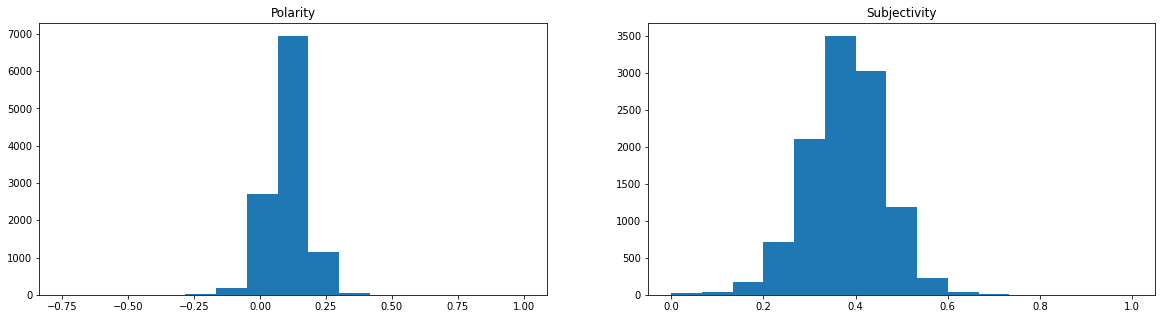

In [119]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].hist(df_extended['polarity'], bins = 15)
ax[0].set_title("Polarity")
ax[1].hist(df_extended['subjectivity'], bins = 15)
ax[1].set_title("Subjectivity")
plt.show()

- Większość tekstów jest neutralna z lekkim przeważeniem w stronę pozytywną (na poziomie ok. 0.13).
- Najwięcej jest tekstów subiektywnych na poziomie ok. 0.4. To znaczy stosunek opinii do faktów występujących w tekstach jest mniej więcej na poziomie 0.4. To znaczy, że w tesktach możemy znaleźć średnio więcej faktów niż subiektywnej oceny, co dodaje tekstom wiarygodności.

In [120]:
df_extended['year'] = df_extended['date'].apply(lambda x: x.year)

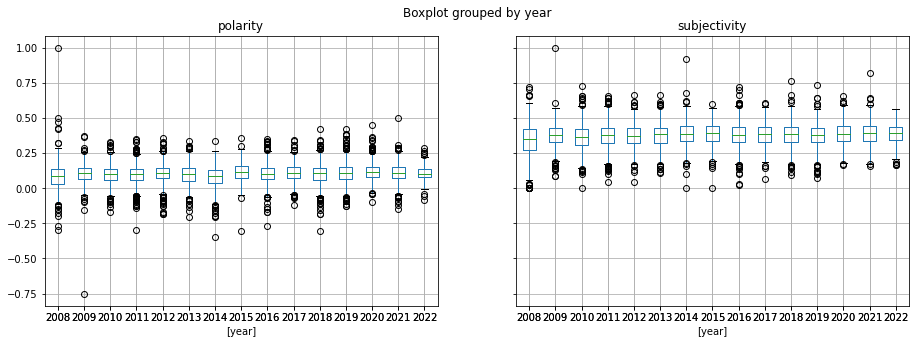

In [121]:
df_extended.boxplot(by = 'year', figsize = (15, 5))
plt.show()

`Polarity` utrzymuje się na podobnym poziomie na przestrzeni lat. Wartości rozrzucone są blisko 0, ale tuż nad nim. Co roku również pojawiało się kilka-kilkanaście dokumentów jako obserwacji odstających - tzn. były albo wyjątkowo pozytywne, albo wyjątkowo negatywne. We wczesnych latach (2008-2009) pojawiły się 2 skrajne dokumenty (1.00 i -0.75), obecnie jednak zachowana jest konwencja pozytywności bliskiej neutralności.

`Subjecetivity` również utrzymuje się na podobnym poziomie. Co ciekawe, w przeszłości (2008, 2010, 2014,2015) pojawiały się dokumenty zupełnie pozbawione subiektywności (na poziomie 0.00) oraz w roku 2009 odkument w pełni subiektywny (na poziomie 1.00).

In [122]:
df_sentiment_grouped = df_extended.groupby('organisation').mean().sort_values('subjectivity', ascending = False).reset_index()

In [123]:
df_sentiment_grouped_loc = df_extended.loc[df_extended.category.apply(lambda x: x in popular_cat)]
df_sentiment_grouped_loc = df_sentiment_grouped_loc.iloc[:,[4,6,7]]

df_sentiment_grouped_loc_org = df_extended.loc[df_extended.organisation.apply(lambda x: x in popular_orgs)]
df_sentiment_grouped_loc_org = df_sentiment_grouped_loc_org.iloc[:,[2,6,7]]

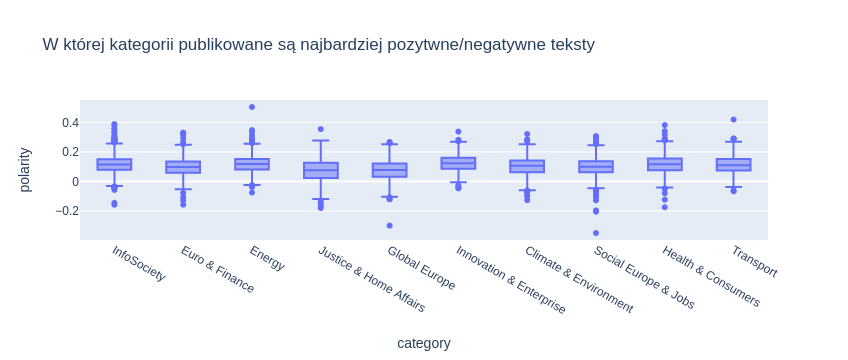

In [124]:
fig = px.box(df_sentiment_grouped_loc, x="category", y="polarity", title = "W której kategorii publikowane są najbardziej pozytwne/negatywne teksty")
fig

We wszystkich kategoriach poziom `polarity` jest bardzo podobny, choć po ręcznym zbadaniu median w każdej z nich minimalnie wyższe wyniki uzyskaliśmy dla kategorii `Innovation & Enterprise` - możemy ją traktować zatem jako pozytywną bardziej niż pozostałe. Minimalnie niższą medianę uzyskała kategoria `Justice & Home Affairs` - możemy ją więc traktować jako nieco bardziej negatywną. Eksperyment ten, mimo drobnych różnic w wartościach polarity, potwierdza intuicję mówiącą, że sądownictwo często wzbudza więcej negatywnych emocji.

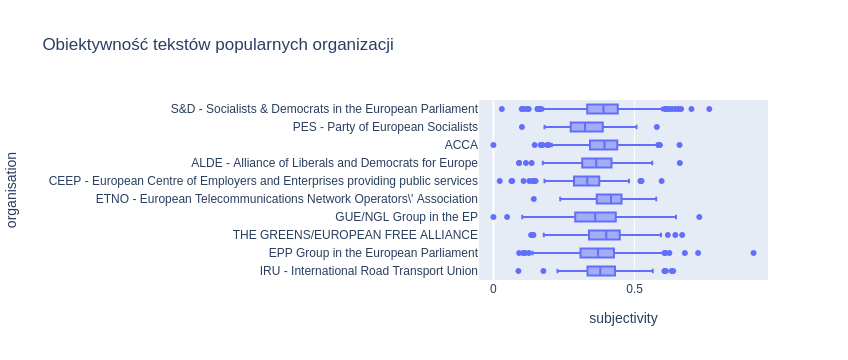

In [125]:
fig = px.box(df_sentiment_grouped_loc_org, y="organisation", x="subjectivity", title = 'Obiektywność tekstów popularnych organizacji')
fig['layout']['yaxis']['autorange'] = "reversed"
fig

Konwencja podobnych poziomów subiektywności jest zachowana również z podziałem na organizacje.

## Nazwy własne - named entities

In [126]:
def tokenize_lemmatize(df_text):
    #standard_tokens = []
    standard_docs = []
    for text in df_text:
        doc = en(text)
        #tokens = [token for token in doc if not token.is_punct]
        #standard_tokens.append(tokens)
        standard_docs.append(doc)
    return standard_docs

In [127]:
def label_entities(docs_speeches):
    ent_labels = [] #lista zawierająca etykiety nazw własnych
    all_ents = [] #lista nazw własnych
    for doc in docs_speeches: 
        entities = doc.ents
        ent_label = [ent.label_ for ent in entities if not ent.label_ == 'ORDINAL' and not ent.label_ == 'CARDINAL']
        entity = [ent for ent in entities if not ent.label_ == 'ORDINAL' and not ent.label_ == 'CARDINAL']
        ent_labels.append(ent_label)
        all_ents.append(entity)
    return all_ents, ent_labels

In [128]:
[all_ents, ent_labels] = label_entities(docs)

- `ORG` organizacje
- `PERSON` osobistości
- `GPE` kraje, miasta, stany
- `DATE` daty
- `NORP`narodowości, religie, grupy polityczne
- `LOC` góry, rzeki, kontynenty
- `WORK_OF_ART` 
- `PRODUCT`
- `MONEY` waluty
- `LAW` dokumenty prawne

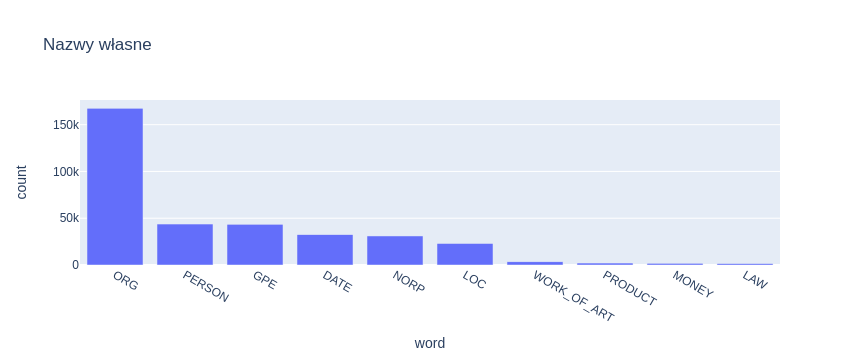

In [129]:
counted_ents = Counter(list(itertools.chain(*ent_labels))).most_common(10)
counts = pd.DataFrame(counted_ents, columns=['word', 'count']).sort_values('count', ascending = False)
fig = px.bar(counts, x = 'word', y = 'count', title = 'Nazwy własne')
fig

Na tak dużą liczność nazw własnych organizacji `ORG` wpływ ma to, że teksty zawierają dużo odniesień do organizacji, przez które zostały napisane.

Zaskakująca może być liczność `LOC`, czyli nazw gór, rzek i kontynentów. W dokumentach prawdopodobnie nie ma za wiele słów dotyczących dwóch pierwszych obiektów, ale raczej dotyczą one kontynentów.

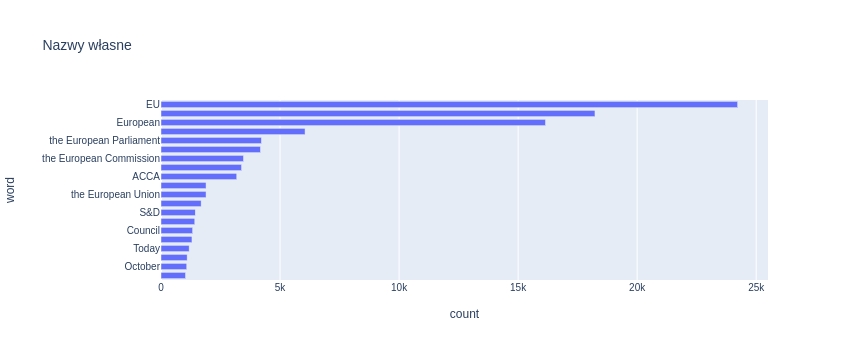

In [130]:
ents = [str(s) for S in all_ents for s in S]
counted_ents = Counter(ents).most_common(20)
counts = pd.DataFrame(counted_ents, columns=['word', 'count']).sort_values('count', ascending = False)
fig = px.bar(counts, x = 'count', y = 'word', title = 'Nazwy własne', orientation = 'h')

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})
fig

Wykres potwierdza wcześniejszą hipotezę nt. liczności `LOC` - drugą najczęstszą nazwą własną jest `Europe`, czyli nazwa kontynentu.
Co dziwne, algorytm za nazwę własną uznał `today` - pewnie zaliczył je do kategorii `DATE`.

Kontynentami/krajami/miastami, do których najczęściej odnoszą się dokumenty, są: Europa, Bruksela, UK, Germany, US, Francja. Świadczy to o ich ważkości wśród wszystkich innych. 

Co ciekawe, na wykresie pojawiło się również słowo `October`, jakoby miało duże znaczenie, ale być może wynika to z tego, że w tymże miesiącu publikowane jest najwięcej dokumentów i w ich treści pojawia się to słowo jako miesiąc publikacji. Sprawdźmy to.

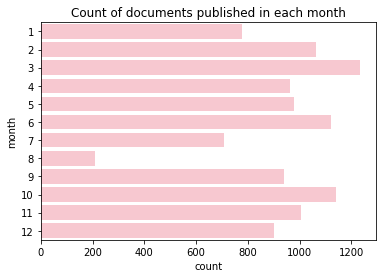

In [131]:
df['month'] = df.date
df.month = df.month.apply(lambda x: x.month)
sns.countplot(y=df.month, data=df, color='pink')
plt.title('Count of documents published in each month')
plt.show()

Rzeczywiście `październik` (10) jest miesiącem, w którym opublikowanych zostało wyjątkowo dużo artykułów - znajduje się na II miejscu pod tym względem. Nie wyjaśnia to niestety dlaczego w takim razie częściej występującym miesiącem (jako nazwa własna) nie jest `marzec`, który jest zdecydowanym liderem pod kątem liczby publikacji.

### Nazwy własne z podziałem na organizacje, akty prawne, miejsca oraz osoby

In [132]:
def plot_entities(all_ents, ent_labels):
    ent_names = ['ORG','LAW','GPE','PERSON']
    fig, ax = plt.subplots(1, 4)
    fig.set_size_inches(15, 3.5)
    
    for j in range(4):
        is_org = list(map(lambda x: x == ent_names[j], list(itertools.chain(*ent_labels))))
        org_list = list(np.array(list(itertools.chain(*all_ents)))[is_org])
        org_list = list(map(lambda x: str(x), org_list))
        counted_orgs = Counter(org_list).most_common(5)
        counts = pd.DataFrame(counted_orgs, columns=['word', 'count']).sort_values('count')
        ax[j].barh(counts.iloc[:,0], counts.iloc[:, 1])
        ax[j].set_title(ent_names[j])

    plt.subplots_adjust(left=0.0,bottom=0.1, right=0.9, top=0.9, wspace=0.8, hspace=0.4)
    

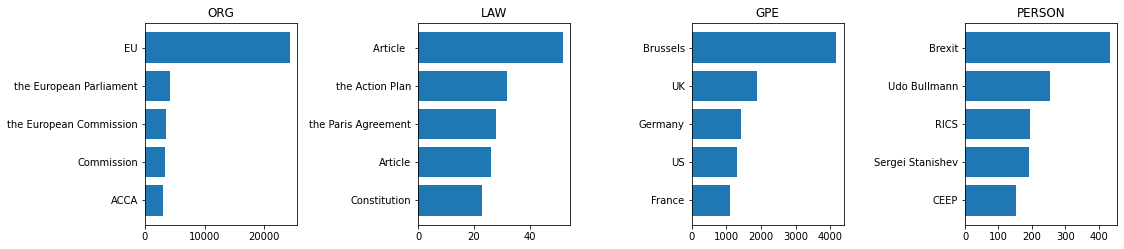

In [133]:
plot_entities(all_ents, ent_labels)

`GPE` - najczęściej odnosi się do `Brukseli`, nic dziwnego - jest to siedziba instytucji UE

Zabawna obserwacja: algorytm potraktował `Brexit` jako osobę. Analiza pozostałych ,,osób'':
- `Udo Bullmann` - niemiecki polityk i nauczyciel akademicki, poseł do Parlamentu Europejskiego; członek Socjaldemokratycznej Partii Niemiec; w roku 2018 został nowym przewodniczącym frakcji `S@D`
- `RICS` (The Royal Institution of Chartered Surveyors) - brytyjska organizacja zawodowa dla geodetów, działa na poziomie międzyrządowym i ma na celu promowanie i egzekwowanie najwyższych międzynarodowych standardów w zakresie wyceny, zarządzania i zagospodarowania gruntów, nieruchomości, budownictwa i infrastruktury - kolejna pomyłka
- `Sergei Stanishev` - bułgarski polityk i dziennikarz, przewodniczący Bułgarskiej Partii Socjalistycznej i Partii Europejskich Socjalistów (PSE), w latach 2005–2009 premier Bułgarii


`LAW` - tutaj też pomyłka: `the European Left` to partia polityczna...

Generalnie słaby ten algorytm.

### Nazwy własne z podziałem na organizacje, akty prawne, miejsca oraz osoby w 2022r

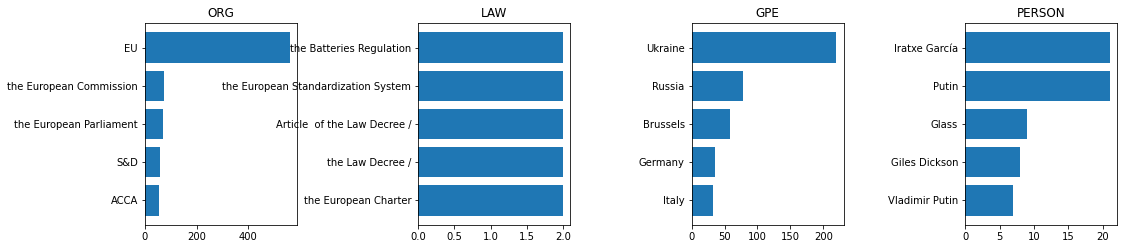

In [134]:
doc_2022 = np.array(docs)[list(df.date.apply(lambda x: x.year == 2022))]
[ents_2022, labels_2022] = label_entities(doc_2022)
plot_entities(ents_2022, labels_2022)                        

`ORG` - z grubsza bez zmian w porównaniu z dokumentami ze wszystkich lat
`LAW` - widać duże różnice, pojawiły się wyszczególnione zagadnienia prawne, któr okazały się ważne w roku 2022 (a raczej w ciągu kilku pierwszych miesięcy tegoż roku).
`GPE` - na pierwszy plan wyszła `Ukraina` i `Rosja` - co nie dziwi ze względu na haniebny atak tej drugiej. Zaskakująca jest z kolei obecność Włoch. ?
`PERSON` - duża zmiana:
- `Iratxe Garcia` - hiszpańska polityk, posłanka do Kongresu Deputowanych, deputowana do Parlamentu Europejskiego, przewodnicząca frakcji Postępowego Sojuszu Socjalistów i Demokratów w Parlamencie Europejskim (S@D)
- `Glass` - raczej pomyłka, nie ma takiej osobistości
- `Giles Dickson` - UK Permanent Representation to the EU, jego motto: 'Leading the promotion of wind energy across Europe'
- `Putin` - bez komentarza

# Krótkie podsumowanie

Zbiór danych, który analizowaliśmy jest tak obszerny, że nie sposób przeanalizować wszystkie ciekawe obserwacje. Udało nam się jednak opisać część z nich.